<a href="https://colab.research.google.com/github/eunzzae/FC_Project_essay/blob/main/ML%EC%BA%90%EA%B8%80%ED%94%8C%EC%A0%9D_%EC%97%90%EC%84%B8%EC%9D%B4%ED%92%88%EC%A7%88%EC%98%88%EC%B8%A1_EDA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = '/content/drive/MyDrive/Colab Notebooks/data/essay_quality/'

train_l = pd.read_csv(data_path+'train_logs.csv')
train_s = pd.read_csv(data_path+'train_scores.csv')
test = pd.read_csv(data_path+'test_logs.csv')
submission = pd.read_csv(data_path+'sample_submission.csv')

In [ ]:
train_l.head()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


In [ ]:
train_s.head()

,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0


In [ ]:
test.head()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,0000aaaa,1,338433,338518,85,Input,Space,Space,,0,0
1,0000aaaa,2,760073,760160,87,Input,Space,Space,,1,0
2,2222bbbb,1,711956,712023,67,Input,q,q,q,0,1
3,2222bbbb,2,290502,290548,46,Input,q,q,q,1,1
4,4444cccc,1,635547,635641,94,Input,Space,Space,,0,0


## Bursts of language

언어의 폭발.
인용: Hayes, J. R., & Ann Choweth, N. (2007). 편집 작업에서의 작업 기억. 서면 커뮤니케이션, 24(4), 283-294. https://doi.org/10.1177/0741088307304826

"많은 연구들이 작가들이 언어의 폭발로 텍스트를 만든다는 것을 발견했습니다. 즉, 텍스트를 만들 때 작가들은 몇 개의 단어를 만들고, 멈추고, 몇 개의 단어를 더 만들고, 멈추고, 잠시 멈추기 등을 합니다. 언어의 폭발의 빈도와 길이는 작가의 능력에 달려 있습니다."

"이 연구는 다음 두 가지 대안 가설에 대해 가설을 시험했습니다: (a) 언어 폭발은 아이디어를 문자 언어로 번역하는 것보다 새로운 아이디어를 제안하는 것에 의해 발생하고 (b) 언어 폭발은 번역 과정보다는 쓰기 과정에 대한 입력의 형태에 따라 달라집니다."

"경험이 많은 작가가 경험이 적은 작가보다 더 긴 버스트를 생성했습니다. ESL 작가(제2언어로서의 영어)는 매우 짧은 버스트를 생성하는 경향이 있었습니다. 작가는 L2보다 L1(제1언어)과 제2언어(L2)에서 더 긴 버스트를 생성했으며 L2 경험이 많은 학생이 L2 경험이 적은 학생보다 더 긴 버스트를 생성했습니다. 작가의 작업 메모리 자원을 제한함으로써 버스트 길이를 줄일 수 있습니다."

"또한 이 연구는 작업 기억력 제한이 작업 수행에 미치는 영향을 조사했습니다."

참고 : https://www.researchgate.net/publication/249738770_Working_Memory_in_an_Editing_Task

In [ ]:
#By Iqbal Syah Akbar https://www.kaggle.com/code/iqbalsyahakbar/ps3e22-multi-class-classification-for-beginners

desc = pd.DataFrame(index = list(train_l))
desc['count'] = train_l.count()
desc['nunique'] = train_l.nunique()
desc['%unique'] = desc['nunique'] / len(train_l) * 100
desc['null'] = train_l.isnull().sum()
desc['type'] = train_l.dtypes
desc = pd.concat([desc, train_l.describe().T], axis = 1)
desc

,count,nunique,%unique,null,type,count,mean,std,min,25%,50%,75%,max
id,8405898,2471,0.029396,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event_id,8405898,12876,0.153178,0,int64,8405898.0,2067.649333,1588.283798,1.0,852.00,1726.0,2926.0,12876.0
down_time,8405898,1836078,21.842735,0,int64,8405898.0,793560.289575,514945.057232,106.0,373184.25,720886.0,1163042.0,8313630.0
up_time,8405898,1835993,21.841724,0,int64,8405898.0,793658.374558,514942.766487,252.0,373282.00,720980.0,1163141.0,8313707.0
action_time,8405898,3509,0.041744,0,int64,8405898.0,98.084982,253.398462,0.0,66.00,93.0,122.0,447470.0
activity,8405898,50,0.000595,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
down_event,8405898,131,0.001558,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
up_event,8405898,130,0.001547,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text_change,8405898,4111,0.048906,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cursor_position,8405898,7803,0.092828,0,int64,8405898.0,1222.964452,948.524233,0.0,499.00,1043.0,1706.0,7802.0


## 결측값

In [ ]:
#By Gabriel Preda https://www.kaggle.com/code/gpreda/presidential-candidates-nigeria-2023-eda

def missing_data(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(train_l)

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,object,int64,int64,int64,int64,object,object,object,object,int64,int64


## 최빈값

In [ ]:
#By Gabriel Preda https://www.kaggle.com/code/gpreda/presidential-candidates-nigeria-2023-eda

def most_frequent_values(df):
    total = df.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in df.columns:
        try:
            itm = df[col].value_counts().index[0]
            val = df[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [ ]:
most_frequent_values(train_l)

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
Total,8405898,8405898,8405898,8405898,8405898,8405898,8405898,8405898,8405898,8405898,8405898
Most frequent item,d3fef198,1,358593,324045,0,Input,q,q,q,0,1
Frequence,12876,2471,21,22,346631,6726796,5365319,5364789,6128208,38765,33041
Percent from total,0.153,0.029,0.0,0.0,4.124,80.025,63.828,63.822,72.904,0.461,0.393


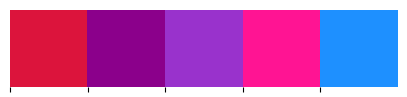

In [ ]:
# Color Palette
custom_colors = ['#DC143C', '#8B008B', '#9932CC', '#FF1493', '#1E90FF']#crimson, darkMagenta, DarkOrchid, DeepPink, DodgerBlue
sns.palplot(sns.color_palette(custom_colors))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# Set tick size
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

In [ ]:
#Snippet by The Devastator https://www.kaggle.com/code/thedevastator/macros-of-popular-high-protein-foods-eda

import gc


def barplot_features(train, feature, title, palette = custom_colors[2:]):
    '''Takes the numerical columns and plots the barplot.'''

    # We need to extract both the name of the category and the no. of appearences
    index = train_l[feature].value_counts().reset_index()["index"].values
    values = train_l[feature].value_counts().reset_index()[feature].values

    plt.figure(figsize = (18, 3))
    sns.barplot(x = index, y = values, palette = palette)
    plt.title(title, fontsize=15)
    plt.show();

    del index, values
    gc.collect()

In [ ]:
#Snippet by The Devastator https://www.kaggle.com/code/thedevastator/macros-of-popular-high-protein-foods-eda

def distplot_features(train, feature, title, color = custom_colors[4], categorical=True):
    '''Takes a column from the dataframe and plots the distribution (after count)'''

    if categorical: values = train_l[feature].value_counts().values
    else: values = train_l[feature].values

    print('Mean: {:,}'.format(np.mean(values)), "\n"
          'Median: {:,}'.format(np.median(values)), "\n"
          'Max: {:,}'.format(np.max(values)))

    plt.figure(figsize = (18, 3))

    if categorical: sns.distplot(values, hist=False, color = color, kde_kws = {'lw':3})
    else:
        # To speed up the process
        if len(values) > 1000000: sns.distplot(values[::250000], hist=False, color = color, kde_kws = {'lw':3})
        else: sns.distplot(values, hist=False, color = color, kde_kws = {'lw':3})

    plt.title(title, fontsize=15)
    plt.show()
    del values
    gc.collect()

## 수치형 탐색

Mean: 2,067.649333360933 
Median: 1,726.0 
Max: 12,876


<ipython-input-25-6445cae4bc0f>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if len(values) > 1000000: sns.distplot(values[::250000], hist=False, color = color, kde_kws = {'lw':3})


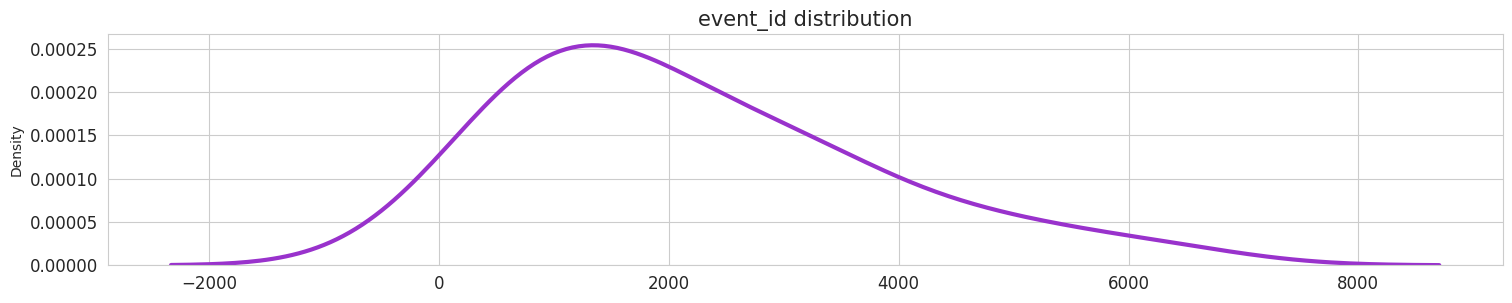

Mean: 793,560.2895752483 
Median: 720,886.0 
Max: 8,313,630


<ipython-input-25-6445cae4bc0f>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if len(values) > 1000000: sns.distplot(values[::250000], hist=False, color = color, kde_kws = {'lw':3})


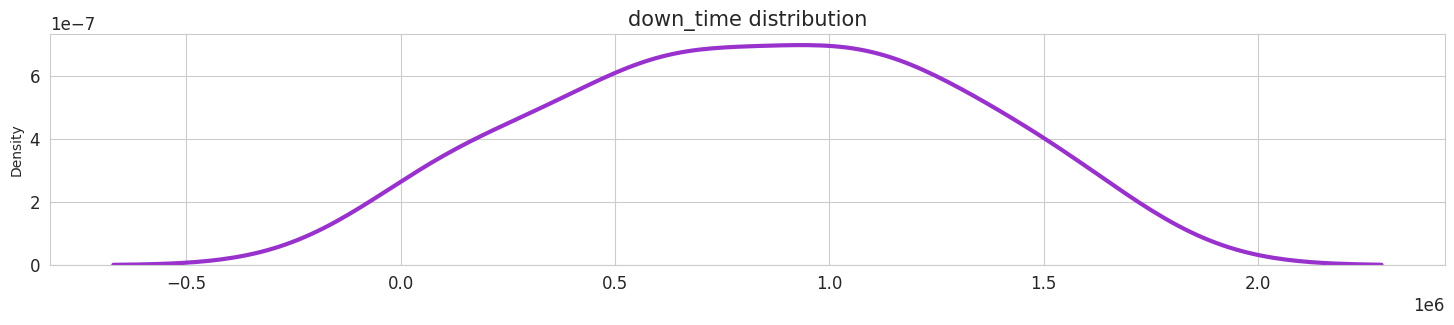

Mean: 793,658.3745576023 
Median: 720,980.0 
Max: 8,313,707


<ipython-input-25-6445cae4bc0f>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if len(values) > 1000000: sns.distplot(values[::250000], hist=False, color = color, kde_kws = {'lw':3})


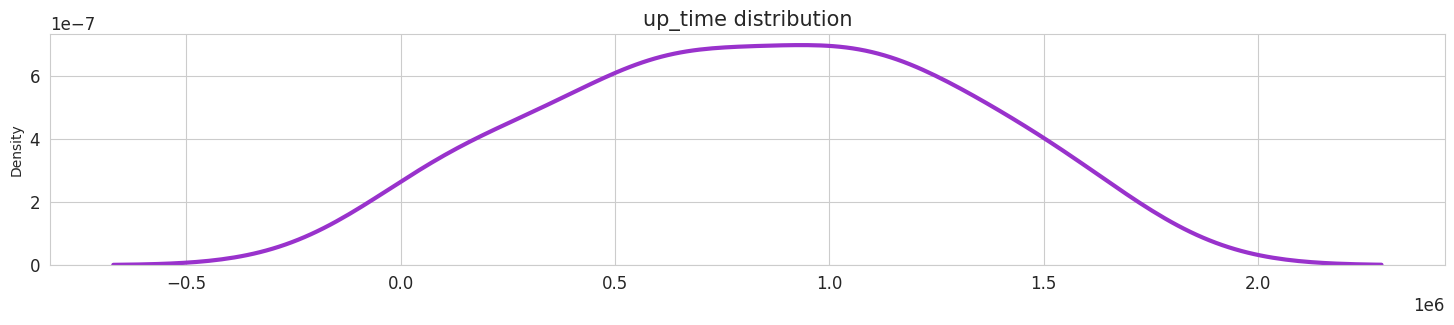

Mean: 98.08498235405663 
Median: 93.0 
Max: 447,470


<ipython-input-25-6445cae4bc0f>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if len(values) > 1000000: sns.distplot(values[::250000], hist=False, color = color, kde_kws = {'lw':3})


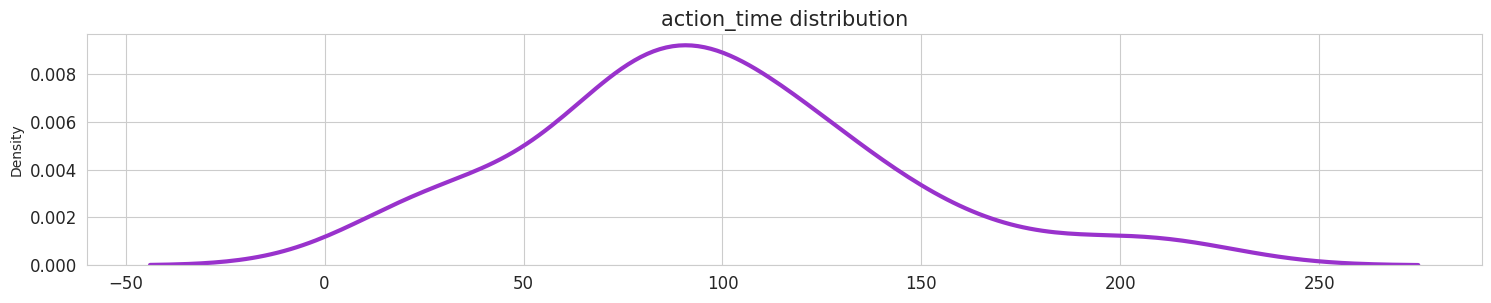

Mean: 1,222.9644521025593 
Median: 1,043.0 
Max: 7,802


<ipython-input-25-6445cae4bc0f>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if len(values) > 1000000: sns.distplot(values[::250000], hist=False, color = color, kde_kws = {'lw':3})


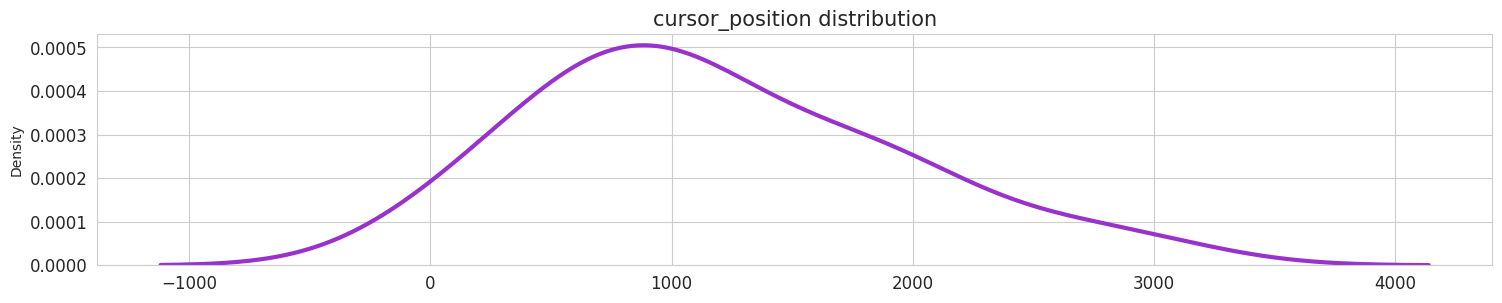

Mean: 231.46874706307403 
Median: 200.0 
Max: 1,326


<ipython-input-25-6445cae4bc0f>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if len(values) > 1000000: sns.distplot(values[::250000], hist=False, color = color, kde_kws = {'lw':3})


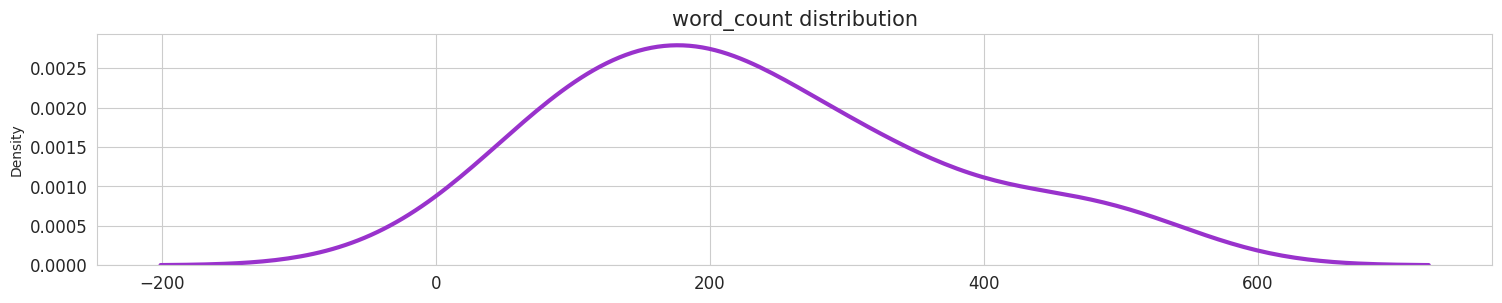

In [ ]:
# https://www.kaggle.com/code/mpwolke/home-value-forecast-2023
#Snippet by The Devastator https://www.kaggle.com/code/thedevastator/macros-of-popular-high-protein-foods-eda

numerical_features = ['event_id', 'down_time', 'up_time', 'action_time', 'cursor_position', 'word_count']

for feature in numerical_features:
    distplot_features(train_l, feature=feature, title = feature + " distribution", color = custom_colors[2], categorical=False)

## 범주형 탐색

Mean: 3,401.8203156616755 
Median: 3,082.0 
Max: 12,876


<ipython-input-25-6445cae4bc0f>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if categorical: sns.distplot(values, hist=False, color = color, kde_kws = {'lw':3})


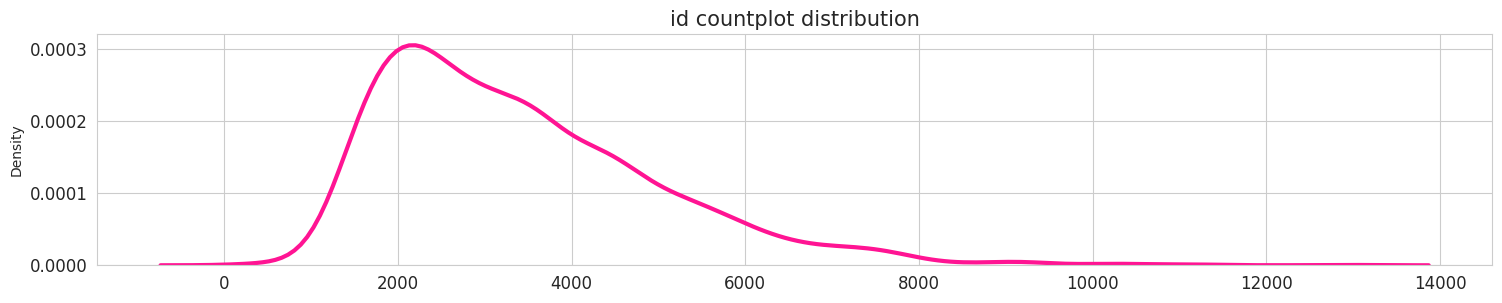

Mean: 168,117.96 
Median: 1.0 
Max: 6,726,796


<ipython-input-25-6445cae4bc0f>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if categorical: sns.distplot(values, hist=False, color = color, kde_kws = {'lw':3})


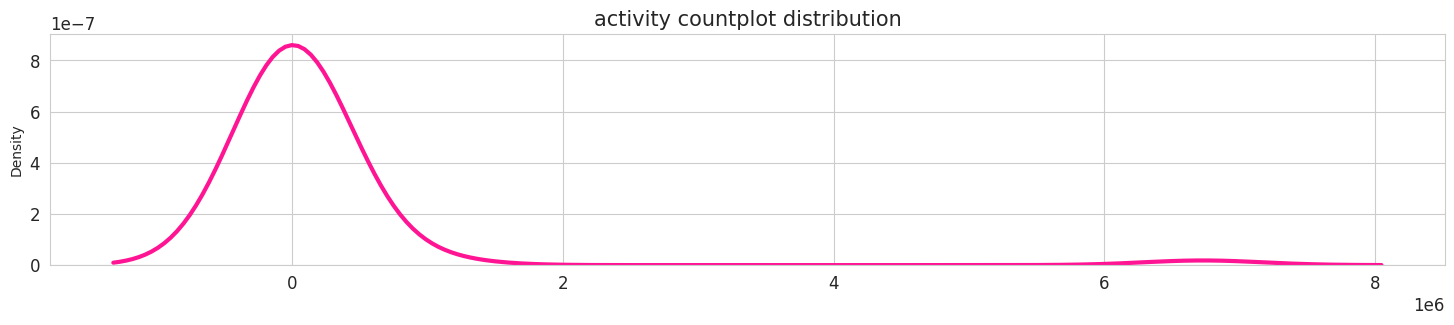

Mean: 64,167.16030534351 
Median: 21.0 
Max: 5,365,319


<ipython-input-25-6445cae4bc0f>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if categorical: sns.distplot(values, hist=False, color = color, kde_kws = {'lw':3})


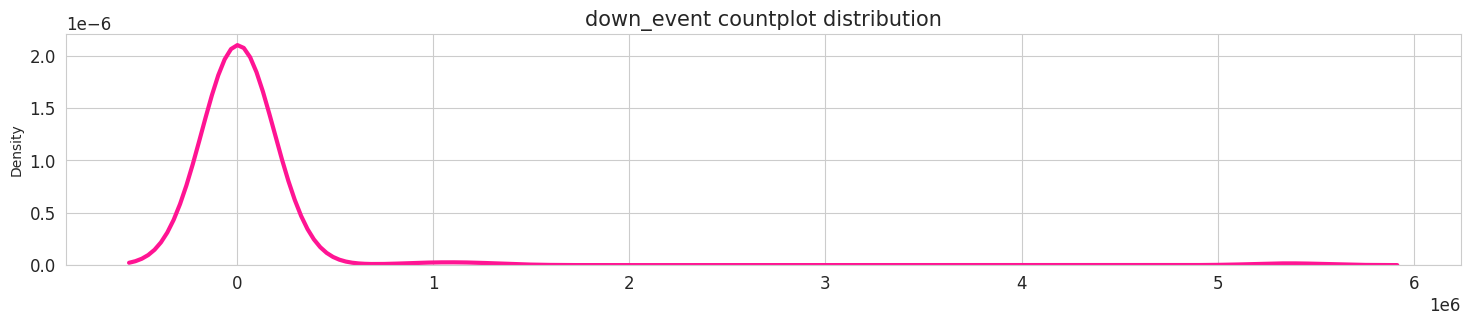

Mean: 64,660.75384615385 
Median: 30.0 
Max: 5,364,789


<ipython-input-25-6445cae4bc0f>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if categorical: sns.distplot(values, hist=False, color = color, kde_kws = {'lw':3})


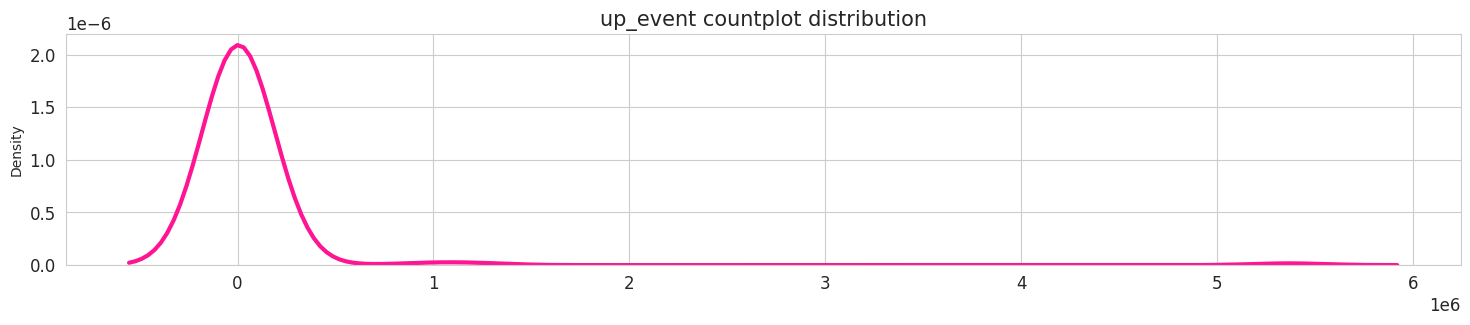

Mean: 2,044.733154950134 
Median: 1.0 
Max: 6,128,208


<ipython-input-25-6445cae4bc0f>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if categorical: sns.distplot(values, hist=False, color = color, kde_kws = {'lw':3})


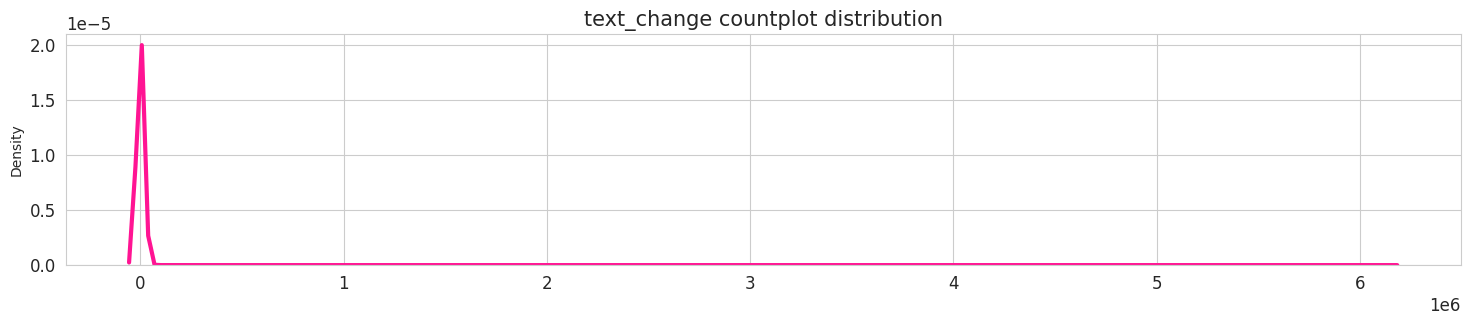

In [ ]:
#Snippet by The Devastator https://www.kaggle.com/code/thedevastator/macros-of-popular-high-protein-foods-eda

categorical_features = ['id','activity', 'down_event', 'up_event', 'text_change']

for feature in categorical_features:
    distplot_features(train_l, feature=feature, title = feature + " countplot distribution", color = custom_colors[3], categorical=True)

## 범주형 피처 고윳값

### 1) activity

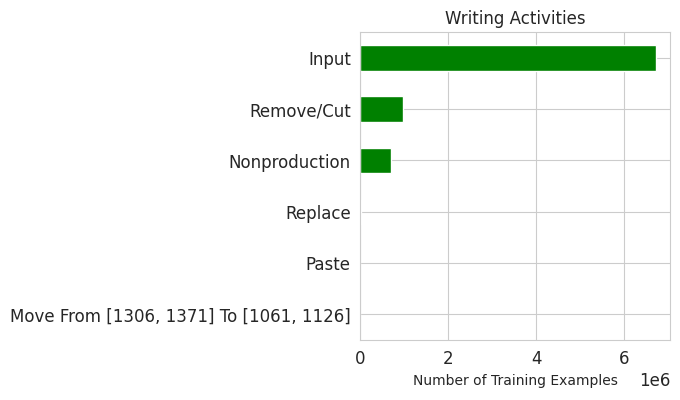

In [ ]:
#By Rob Mulla https://www.kaggle.com/code/robikscube/sign-language-recognition-eda-twitch-stream

fig, ax = plt.subplots(figsize=(4, 4))
train_l["activity"].value_counts().head(6).sort_values(ascending=True).plot(kind="barh", color='g', ax=ax, title="Writing Activities"
)
ax.set_xlabel("Number of Training Examples")
plt.show()

### 2) Down and Up Events

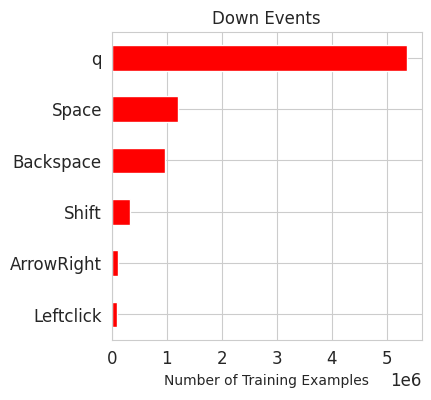

In [ ]:
#By Rob Mulla https://www.kaggle.com/code/robikscube/sign-language-recognition-eda-twitch-stream

fig, ax = plt.subplots(figsize=(4, 4))
train_l["down_event"].value_counts().head(6).sort_values(ascending=True).plot(
    kind="barh", color='r', ax=ax, title="Down Events"
)
ax.set_xlabel("Number of Training Examples")
plt.show()

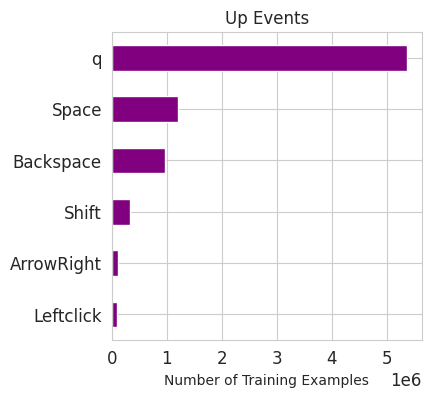

In [ ]:
#By Rob Mulla https://www.kaggle.com/code/robikscube/sign-language-recognition-eda-twitch-stream

fig, ax = plt.subplots(figsize=(4, 4))
train_l["up_event"].value_counts().head(6).sort_values(ascending=True).plot(
    kind="barh", color='purple', ax=ax, title="Up Events"
)
ax.set_xlabel("Number of Training Examples")
plt.show()

## 품질 측정

"품질의 척도는 다음과 같습니다:

"복잡도(최종 문장의 절 수 기준)"

"기계적 오류(최종 문장의 문법, 타이핑 또는 철자 오류의 수를 기준으로 함)"

"전체적 품질(같은 만화를 묘사하는 동일한 텍스트 가시성 조건의 모든 문장 대비 문장의 품질 순위 기준)"

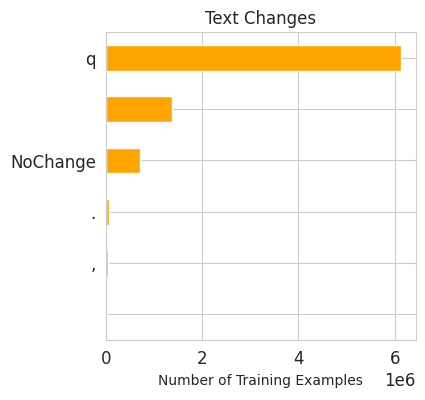

In [ ]:
#By Rob Mulla https://www.kaggle.com/code/robikscube/sign-language-recognition-eda-twitch-stream

fig, ax = plt.subplots(figsize=(4, 4))
train_l["text_change"].value_counts().head(6).sort_values(ascending=True).plot(
    kind="barh", color='orange', ax=ax, title="Text Changes"
)
ax.set_xlabel("Number of Training Examples")
plt.show()